In [8]:
# PREDICTING HEART DISEASES

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('Heart_Disease_Prediction.csv')
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [12]:
df.describe()


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [13]:
df.duplicated().any()


False

In [14]:
#It says no duplicate Values

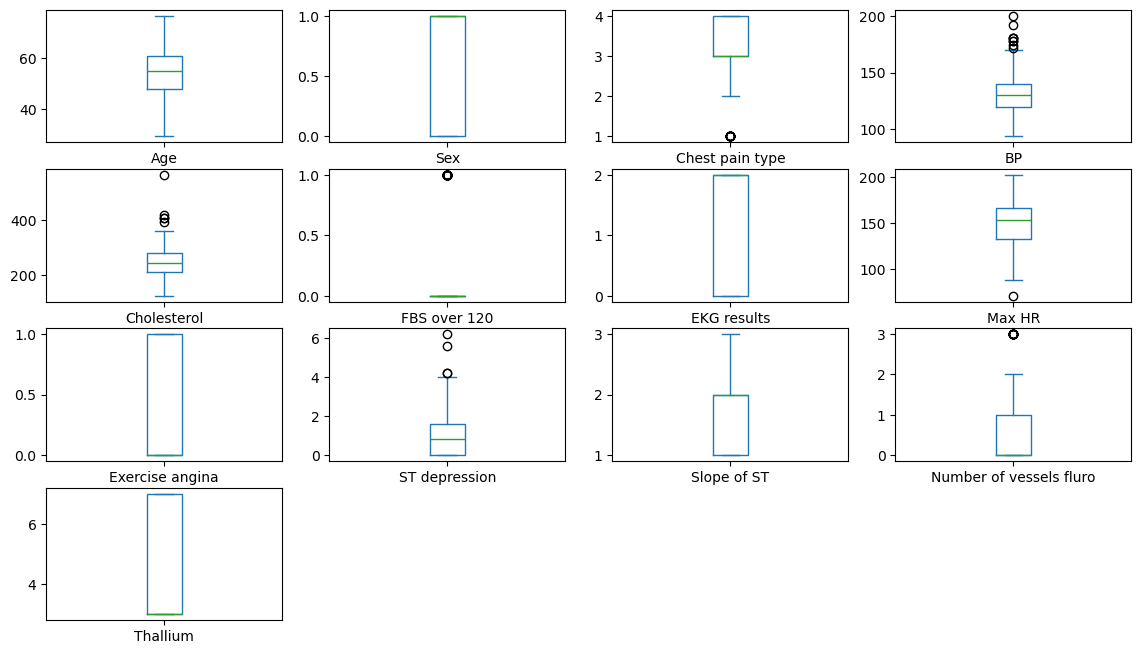

In [15]:
df.plot(kind = "box" , subplots = True , figsize = (14,10) , layout = (5,4))
plt.show()
#It Shows All The Outliers Present Using Box Plot

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

In [17]:
df['Heart Disease'] = df['Heart Disease'].map({'Absence':0, 'Presence':1})

In [18]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

In [20]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


C:\Users\Chait\AppData\Local\Temp\ipykernel_8652\987176045.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Thallium', y='Heart Disease', data=df, palette='Set2')


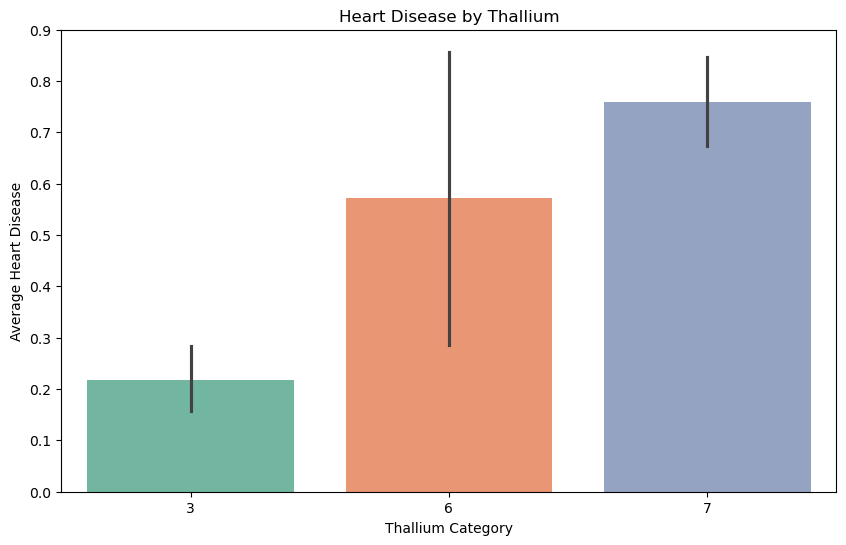

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='Thallium', y='Heart Disease', data=df, palette='Set2')
plt.title('Heart Disease by Thallium')
plt.ylabel('Average Heart Disease')
plt.xlabel('Thallium Category')
plt.show()


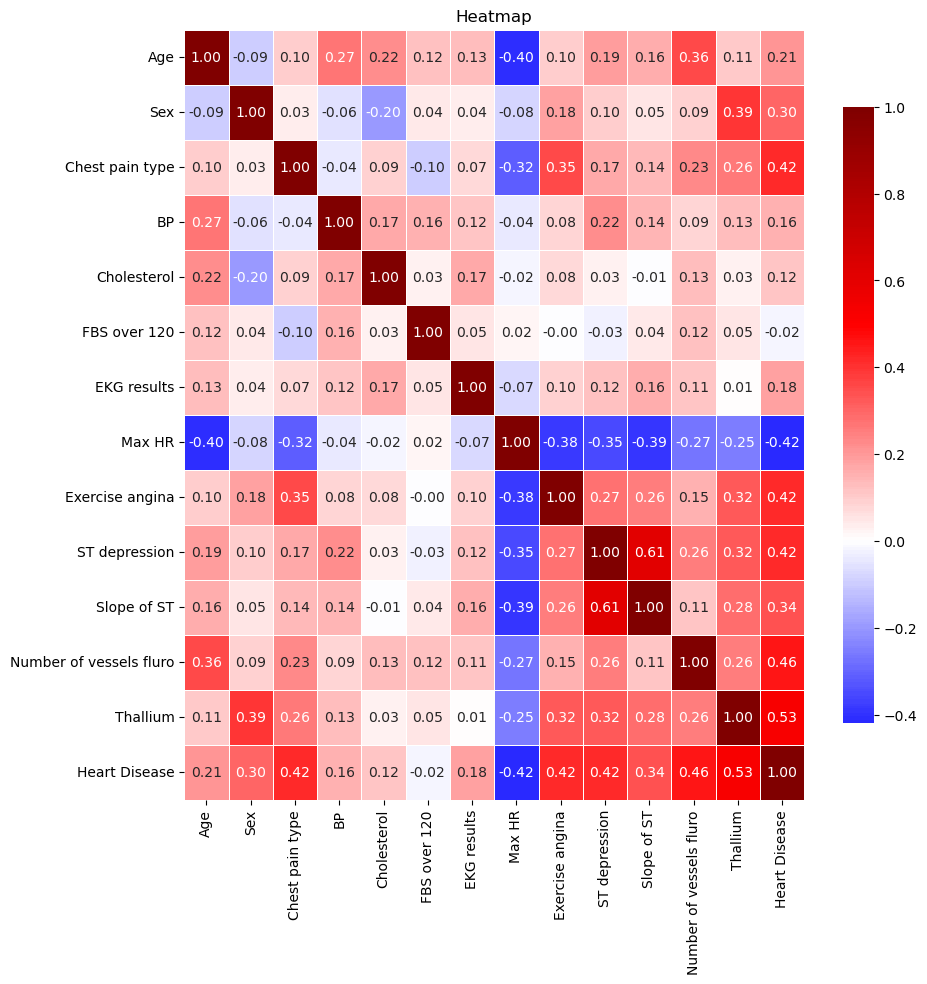

In [23]:
def plot_heatmap(df, title='Heatmap', figsize=(10,10), cmap='coolwarm'):
    plt.figure(figsize=figsize)
    plt.title(f'{title}')
    sns.heatmap(df.corr(), cmap='seismic', center=0, annot=True, fmt=".2f", linewidth=0.5, cbar_kws={'shrink': 0.8})
    plt.show()
plot_heatmap(df)

In [24]:
X = df.drop('Heart Disease', axis=1)
Y = df['Heart Disease']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.25, random_state=42)

In [26]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

D:\anaconda-files\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Accuracy: 0.8970588235294118
F1 Score: 0.8960057767139591
Precision: 0.8986593707250341
Recall: 0.8970588235294118
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.92        40
           1       0.92      0.82      0.87        28

    accuracy                           0.90        68
   macro avg       0.90      0.89      0.89        68
weighted avg       0.90      0.90      0.90        68



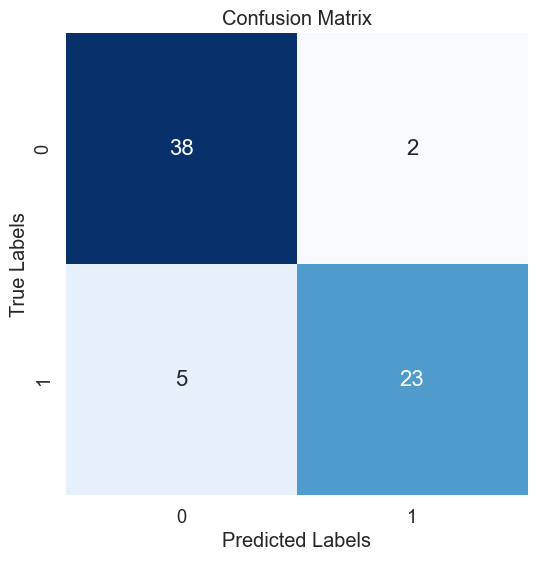

In [27]:
from sklearn.metrics import accuracy_score, f1_score,precision_score, recall_score, classification_report
# Make predictions on the test set
y_pred = model.predict(X_test)
# Evaluate the model with  accuracy, F1 score, precision and recall
accuracy = accuracy_score(y_test, y_pred)

#Score Prediction for the Dataset for precision,Recall,F1 Score and Accuracy
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
classifcation_report_logistic = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Classification Report:")
print(classifcation_report_logistic)


# confusion matrix for model performance assessment
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16}, cbar=False, square=True)
# Add labels and titles
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
# Show the plot
plt.show()

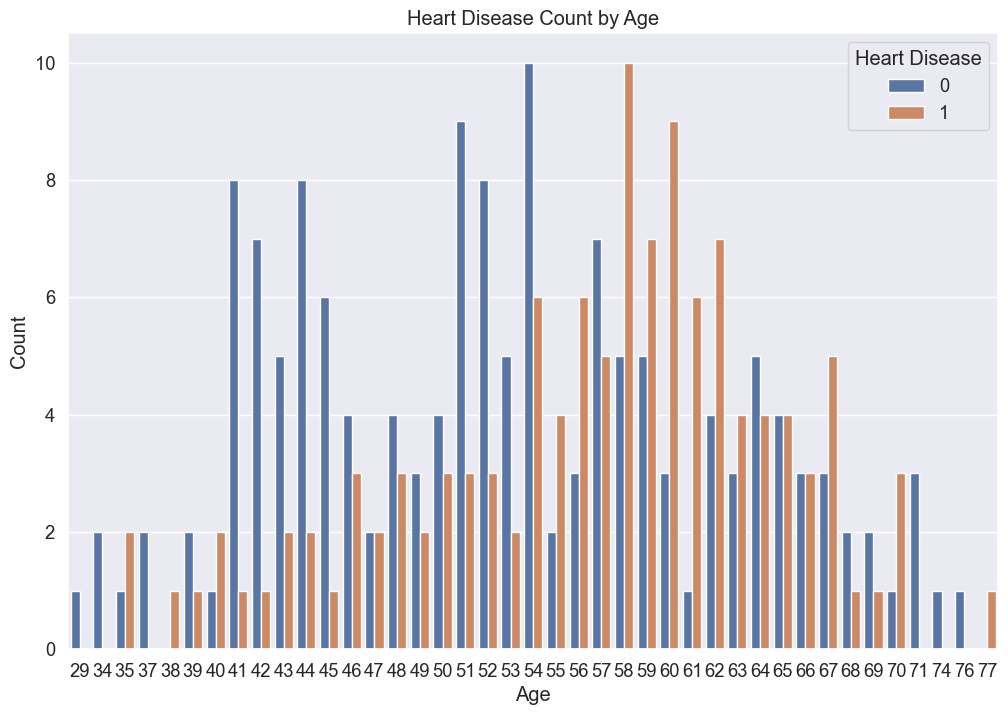

In [28]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Age', hue='Heart Disease', data=df)
plt.title('Heart Disease Count by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Heart Disease')
plt.show()

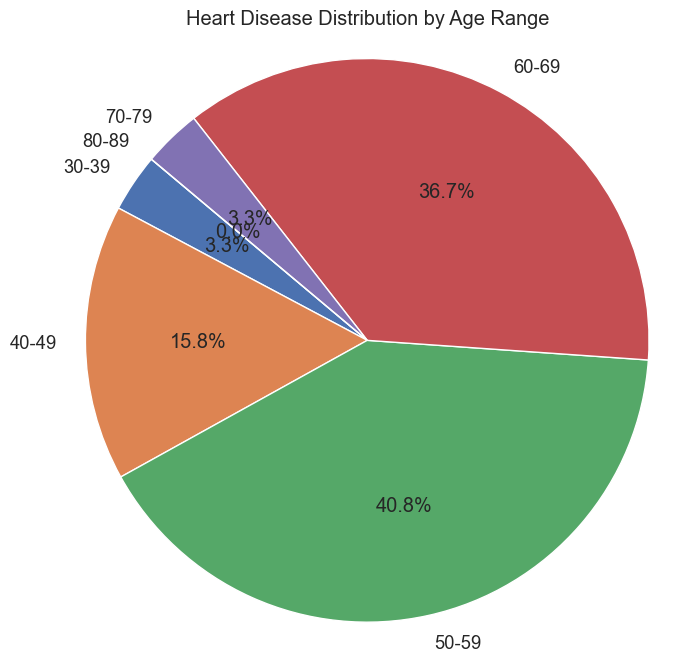

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Bin ages into ranges
df['Age Range'] = pd.cut(df['Age'], bins=[29, 39, 49, 59, 69, 79, 89],
                         labels=['30-39', '40-49', '50-59', '60-69', '70-79', '80-89'])

# Filter those with Heart Disease (assuming 1 = has disease)
heart_disease_counts = df[df['Heart Disease'] == 1]['Age Range'].value_counts().sort_index()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(heart_disease_counts, labels=heart_disease_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Heart Disease Distribution by Age Range')
plt.axis('equal')  # To make it a circle
plt.show()


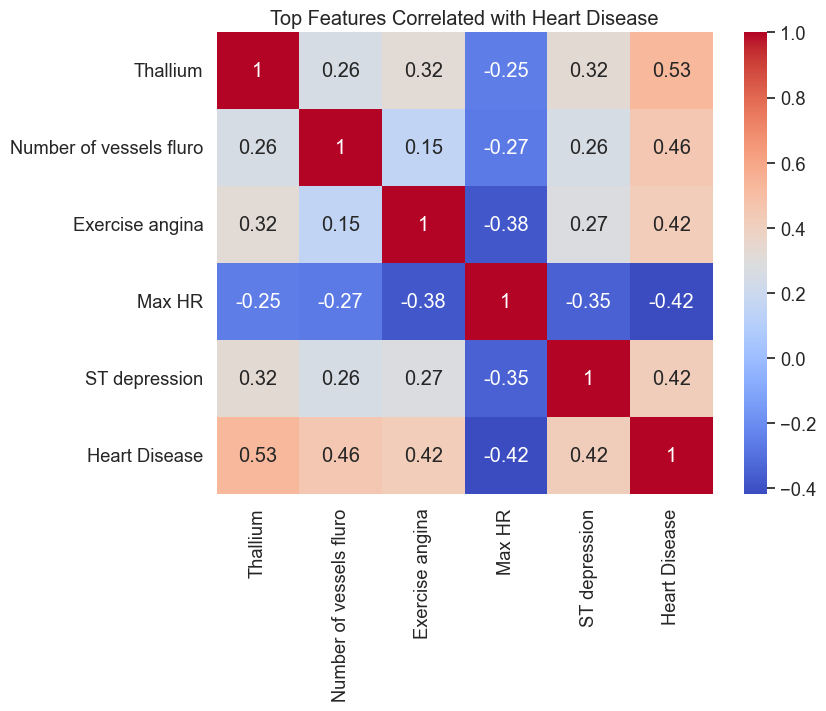

In [30]:
# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Get correlation with 'Heart Disease'
correlation_with_target = corr_matrix['Heart Disease'].abs().sort_values(ascending=False)

# Select top 5 features excluding 'Heart Disease' itself
top_features = correlation_with_target[1:6].index  # skip first (which is Heart Disease itself)

# Plot heatmap of top features
plt.figure(figsize=(8, 6))
sns.heatmap(df[top_features.tolist() + ['Heart Disease']].corr(), annot=True, cmap='coolwarm')
plt.title('Top Features Correlated with Heart Disease')
plt.show()


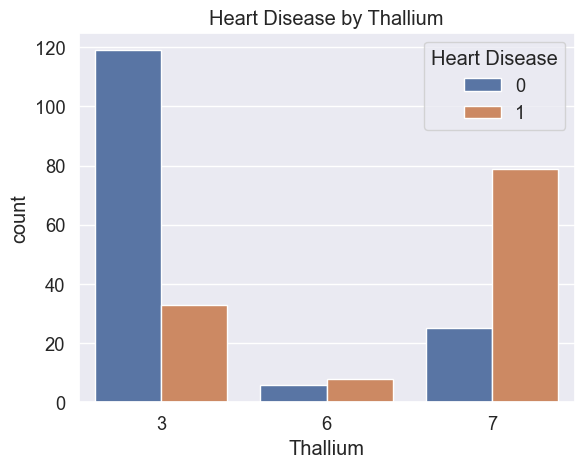

In [31]:
sns.countplot(x='Thallium', hue='Heart Disease', data=df)
plt.title('Heart Disease by Thallium')
plt.show()


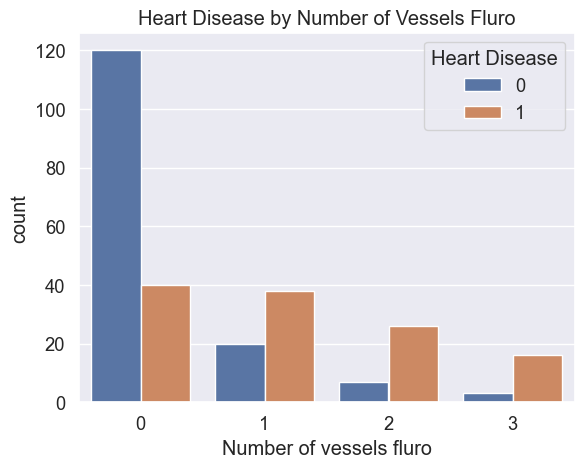

In [32]:
sns.countplot(x='Number of vessels fluro', hue='Heart Disease', data=df)
plt.title('Heart Disease by Number of Vessels Fluro')
plt.show()


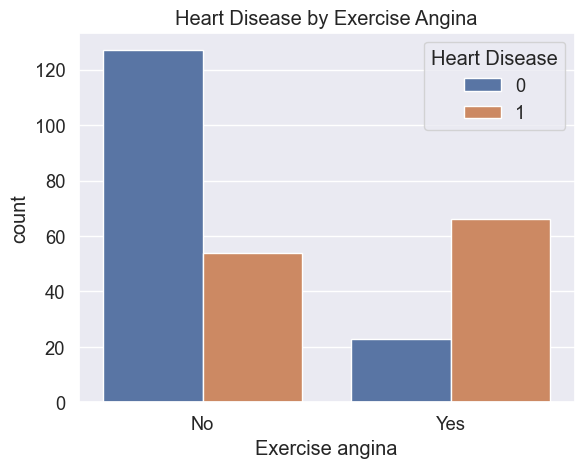

In [33]:
sns.countplot(x='Exercise angina', hue='Heart Disease', data=df)
plt.title('Heart Disease by Exercise Angina')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


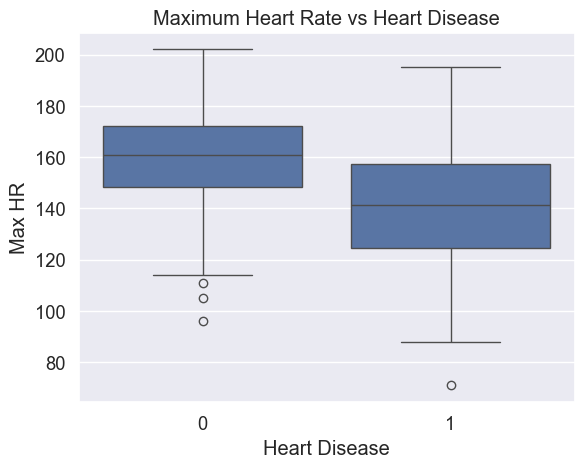

In [34]:
sns.boxplot(x='Heart Disease', y='Max HR', data=df)
plt.title('Maximum Heart Rate vs Heart Disease')
plt.show()


In [35]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [36]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

In [37]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8235294117647058

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.93      0.86        40
           1       0.86      0.68      0.76        28

    accuracy                           0.82        68
   macro avg       0.83      0.80      0.81        68
weighted avg       0.83      0.82      0.82        68



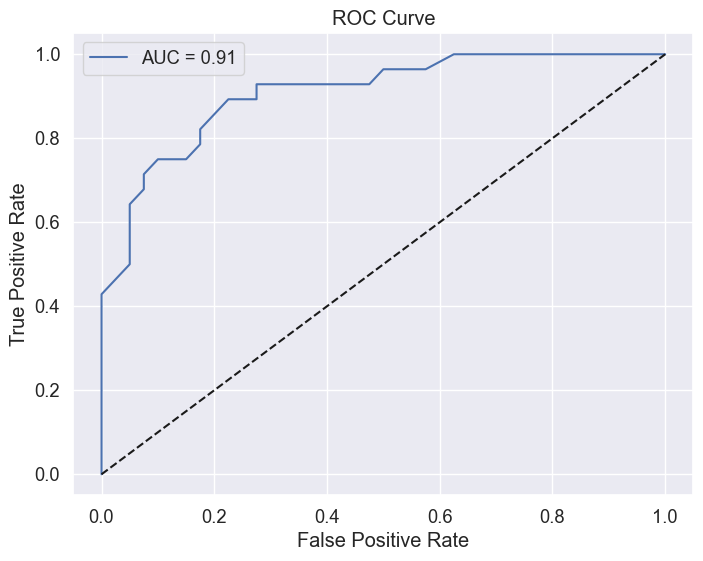

In [38]:
y_prob = rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_prob):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

Text(0, 0.5, 'Feature')

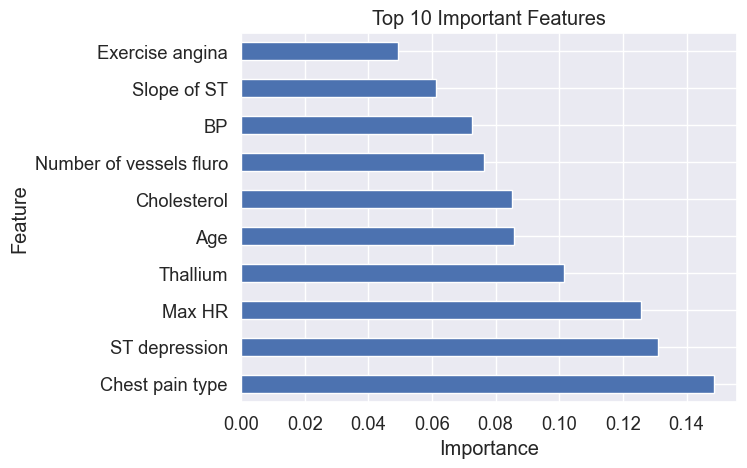

In [39]:
feature_imp = pd.Series(rf.feature_importances_, index=X.columns)
feature_imp.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.xlabel("Importance")
plt.ylabel("Feature")

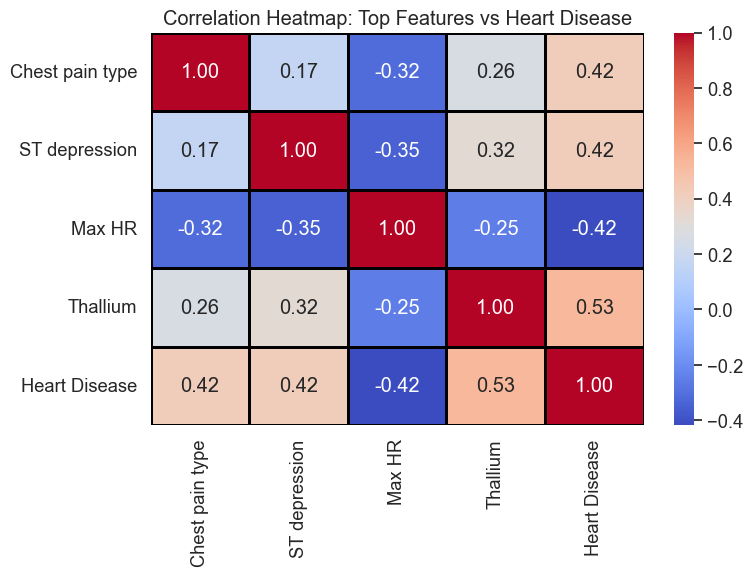

In [80]:
#Selecting top 4 features and workinf for correlation
features = ['Chest pain type', 'ST depression', 'Max HR', 'Thallium', 'Heart Disease']
df_selected = df[features]

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_selected.corr(), annot=True, cmap='coolwarm', fmt=".2f",linewidth=1,linecolor = 'black')
plt.title('Correlation Heatmap: Top Features vs Heart Disease')
plt.tight_layout()
plt.show()

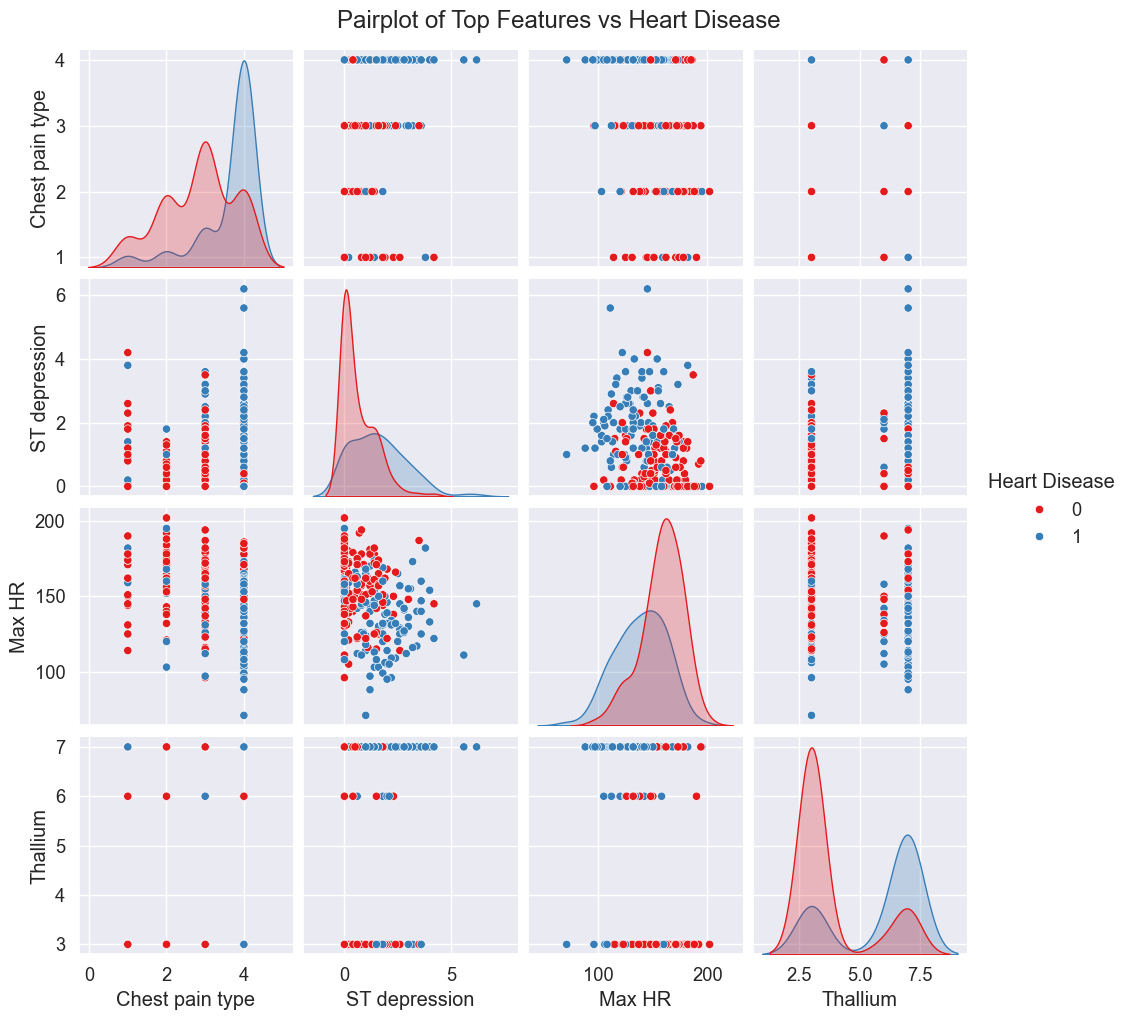

In [78]:
features = ['Chest pain type', 'ST depression', 'Max HR', 'Thallium', 'Heart Disease']
df_selected = df[features]

# Create the pairplot
sns.pairplot(df_selected, hue='Heart Disease', palette='Set1', diag_kind='kde')
plt.suptitle('Pairplot of Top Features vs Heart Disease', y=1.02)
plt.show()

In [224]:
dt_clf = DecisionTreeClassifier(random_state=42)

# Train and evaluate:
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree accuracy:", dt_accuracy)

Decision Tree accuracy: 0.75


In [ ]:
#Implementation of Decision Tree

In [82]:
from sklearn.tree import DecisionTreeClassifier
# Initialize Decision Tree Classifier
tree = DecisionTreeClassifier(max_depth=5,random_state=42)
# Train the model
tree.fit(X_train,y_train)
# Make predictions on the test set
y_prediction_tree = tree.predict(X_test)
# Evaluate the model with  accuracy, F1 score, precision and recall
accuracy = accuracy_score(y_test, y_prediction_tree)
f1 = f1_score(y_test, y_prediction_tree, average='weighted')
precision = precision_score(y_test,y_prediction_tree, average='weighted')
recall = recall_score(y_test, y_prediction_tree, average='weighted')
classifcation_report_ = classification_report(y_test, y_prediction_tree)
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Classification Report:")
print(classifcation_report_)

Accuracy: 0.7941176470588235
F1 Score: 0.7950278254537889
Precision: 0.7973168214654283
Recall: 0.7941176470588235
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82        40
           1       0.73      0.79      0.76        28

    accuracy                           0.79        68
   macro avg       0.79      0.79      0.79        68
weighted avg       0.80      0.79      0.80        68



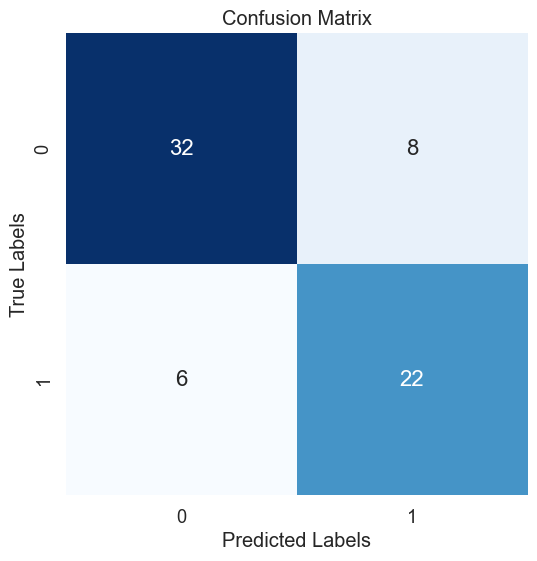

In [84]:
cm = confusion_matrix(y_test,y_prediction_tree)
# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16}, cbar=False, square=True)
# Add labels and titles
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
# Show the plot
plt.show()

In [228]:
rf_clf = RandomForestClassifier(n_estimators=100,  random_state=42)

# Train and evaluate:
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
random_accuracy = accuracy_score(y_test, y_pred)
print("Random Forest accuracy:", random_accuracy)

Random Forest accuracy: 0.8235294117647058


In [ ]:
#RANDOM FOREST

In [90]:
from sklearn.ensemble import RandomForestClassifier
# Initialize RandomFores Classifier
rf = RandomForestClassifier(n_estimators=200,max_depth=7,random_state=42)
# train the model
rf.fit(X_train,y_train)
# Make predictions on the test set
y_pred_rf = rf.predict(X_test)
# Evaluate the model with  accuracy, F1 score, precision and recall
accuracy = accuracy_score(y_test,y_pred_rf)
f1 = f1_score(y_test, y_pred_rf, average='weighted')
precision = precision_score(y_test,y_pred_rf, average='weighted')
recall = recall_score(y_test, y_pred_rf, average='weighted')
classifcation_report_ = classification_report(y_test, y_pred_rf)
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Classification Report:")
print(classifcation_report_)

Accuracy: 0.8529411764705882
F1 Score: 0.8492476060191518
Precision: 0.8602650546384562
Recall: 0.8529411764705882
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.95      0.88        40
           1       0.91      0.71      0.80        28

    accuracy                           0.85        68
   macro avg       0.87      0.83      0.84        68
weighted avg       0.86      0.85      0.85        68



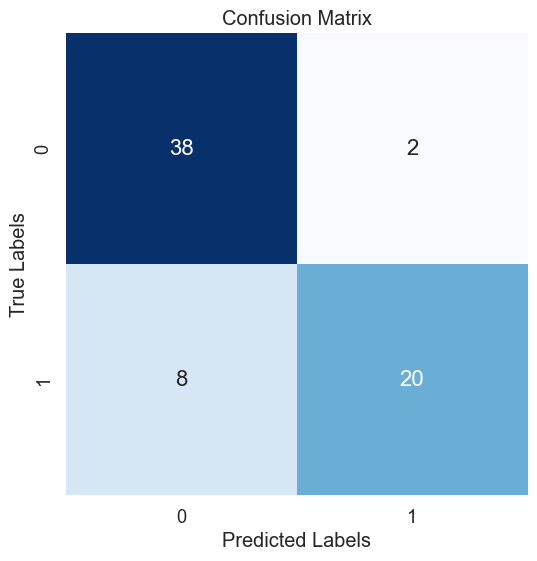

In [92]:
cm = confusion_matrix(y_test,y_pred_rf)
# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16}, cbar=False, square=True)
# Add labels and titles
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
# Show the plot
plt.show()

In [ ]:
#Implementation of XG BOOST

In [114]:
import xgboost as xgb
from xgboost import XGBClassifier
# Initialize xgb Classifier
xgb_classifier = xgb.XGBClassifier ( n_estimators=200,learning_rate=0.2, max_depth=7,random_state=42)
xgb_classifier.fit(X_train,y_train)
# Make predictions on the testing data
y_pred_xgb = xgb_classifier.predict(X_test)
# Evaluate the model with  accuracy, F1 score, precision and recall
accuracy = accuracy_score(y_test,y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb, average='weighted')
precision = precision_score(y_test,y_pred_xgb, average='weighted')
recall = recall_score(y_test, y_pred_xgb, average='weighted')
classifcation_report_ = classification_report(y_test, y_pred_xgb)
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Classification Report:")
print(classifcation_report_)

Accuracy: 0.8529411764705882
F1 Score: 0.8492476060191518
Precision: 0.8602650546384562
Recall: 0.8529411764705882
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.95      0.88        40
           1       0.91      0.71      0.80        28

    accuracy                           0.85        68
   macro avg       0.87      0.83      0.84        68
weighted avg       0.86      0.85      0.85        68



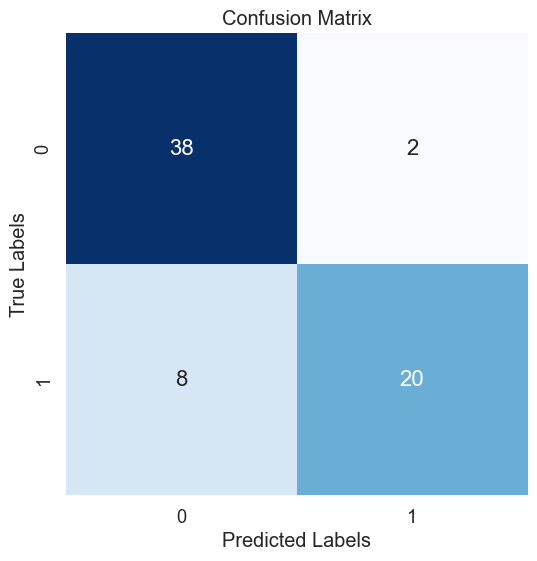

In [116]:
cm = confusion_matrix(y_test,y_pred_xgb)
# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16}, cbar=False, square=True)
# Add labels and titles
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
# Show the plot
plt.show()

In [160]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [174]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

D:\anaconda-files\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [180]:
prediction = classifier.predict(X_test)
accuracy = accuracy_score(y_test, prediction)

In [182]:
accuracy_dict = {}
accuracy_dict['Logistic Regression'] = round((accuracy * 100),2)

In [184]:
print(f'Accuracy: {accuracy}')

Accuracy: 0.8970588235294118


In [126]:
accuracy_dict

{'Logistic Regression': 85.29}

In [ ]:
#Gradient Boosting Classifier

In [144]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the model
model = GradientBoostingClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

accuracy_dict['GBC'] = round(accuracy * 100, 2)

conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# Classification Report
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

Accuracy: 0.8235294117647058
Confusion Matrix:
[[36  4]
 [ 8 20]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        40
           1       0.83      0.71      0.77        28

    accuracy                           0.82        68
   macro avg       0.83      0.81      0.81        68
weighted avg       0.82      0.82      0.82        68



In [156]:
#Bagging Method

In [146]:
from sklearn.ensemble import  BaggingClassifier, GradientBoostingClassifier,RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [154]:
# Create a base classifier (e.g., DecisionTreeClassifier):
base_clf = DecisionTreeClassifier()

# Create the bagging classifier:
bagging_clf = BaggingClassifier(estimator=base_clf, n_estimators=100, random_state=42)

# Train and evaluate (similar to Voting):
bagging_clf.fit(X_train, y_train)
y_pred = bagging_clf.predict(X_test)
bagging_accuracy = accuracy_score(y_test, y_pred)
print("Bagging accuracy:", bagging_accuracy)


Bagging accuracy: 0.8235294117647058


In [ ]:
#Boosting Method

In [190]:
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_clf.fit(X_train, y_train)
y_pred = gb_clf.predict(X_test)
boosting_accuracy = accuracy_score(y_test, y_pred)
print("Boosting accuracy:", boosting_accuracy)

Boosting accuracy: 0.8235294117647058


In [200]:
# Define the base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42))
]

# Define the meta-model
meta_model = LogisticRegression()

# Create the stacking classifier
stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Train the stacking classifier on the training data
stacking_classifier.fit(X_train, y_train)

# Make predictions on the test set
stacking_predictions = stacking_classifier.predict(X_test)

# Evaluate the performance
stack_accuracy = accuracy_score(y_test, stacking_predictions)
print(f'Accuracy of Stacking Classifier: {stack_accuracy}')

Accuracy of Stacking Classifier: 0.8382352941176471


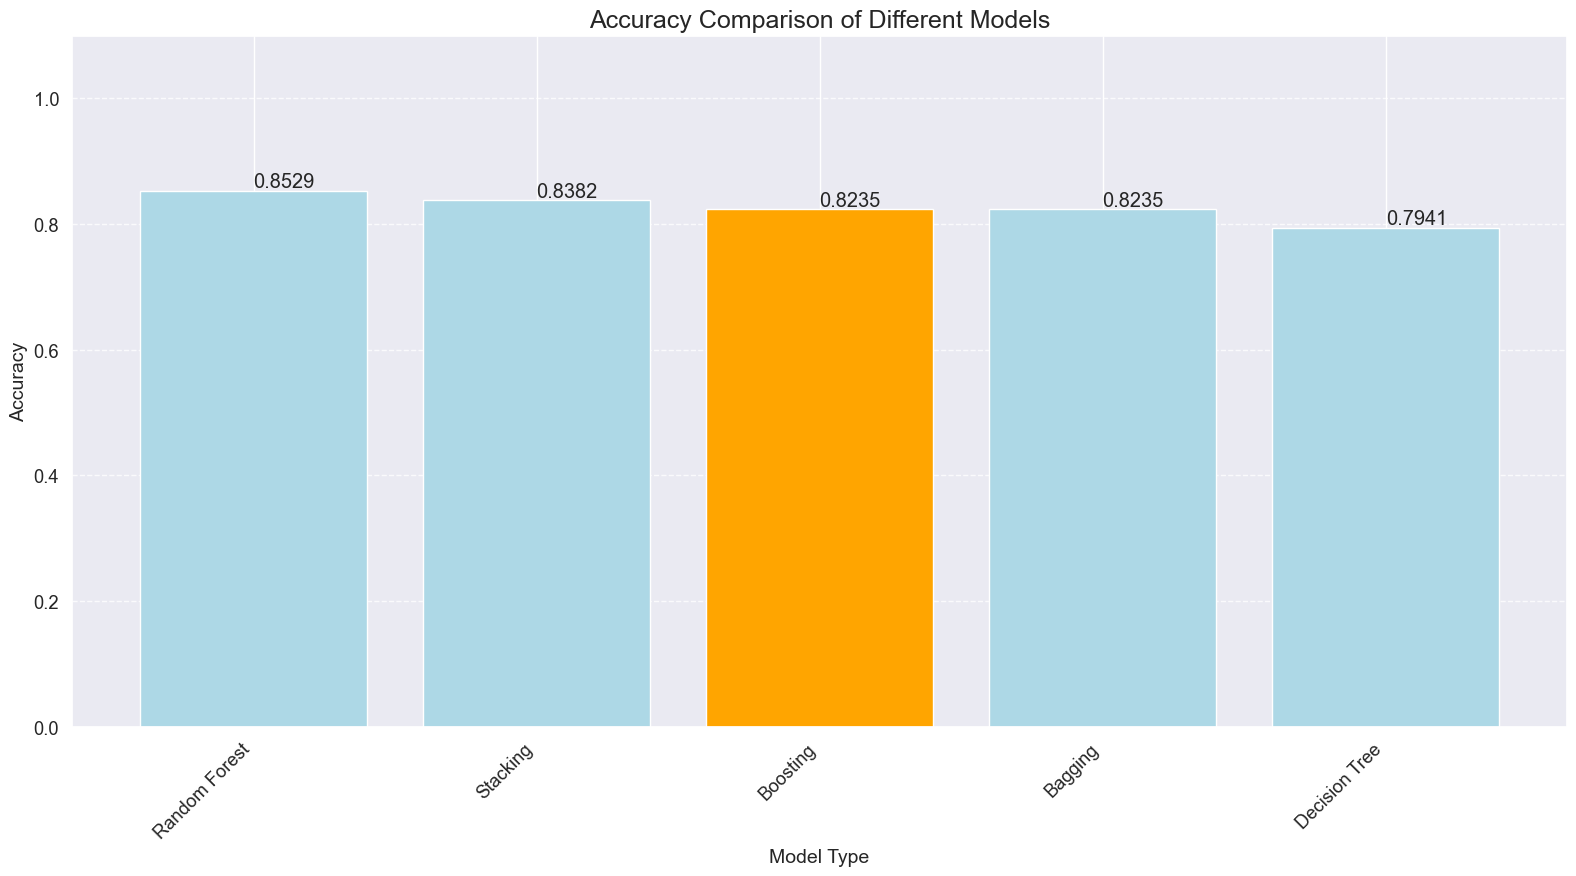

In [204]:
from sklearn.metrics import accuracy_score

accuracies = {
    "Decision Tree": accuracy_score(y_test, y_prediction_tree),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "Stacking": stack_accuracy,  # already a score
    "Boosting": boosting_accuracy,  # already a score
    "Bagging": bagging_accuracy  # already a score
}



accuracies = dict(sorted(accuracies.items(), key=lambda item: item[1], reverse=True))

# Create the bar chart
plt.figure(figsize=(16, 9))  # Adjust figure size as needed

colors = ['lightblue' if model != 'Boosting' else 'orange' for model in accuracies.keys()]
plt.bar(accuracies.keys(), accuracies.values(), color=colors)
# Customize chart elements
plt.xlabel("Model Type", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.title("Accuracy Comparison of Different Models", fontsize=18)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.ylim(0, 1.1)  # Set y-axis limits for precision

plt.grid(axis='y', linestyle='--', alpha=0.8)  # Add grid lines

# Annotate each bar with 8 decimal places
for i, v in enumerate(accuracies.values()):
    plt.text(i, v + 0.005, f"{v:.4f}")  # Format with 8 decimals

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [206]:
#Voting Classifier

In [232]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# Create a list of tuples with (model_name, model_instance)
models = [ ( "Decision Tree", dt_clf), ("Random Forest",rf_clf), ( "Stacking", stacking_classifier), 
          ("Boosting", gb_clf),("Bagging", bagging_clf)]

# Create a Voting Classifier
voting_classifier = VotingClassifier(estimators=models, voting='hard')  # 'hard' for majority voting


# Fit the Voting Classifier on the training data
voting_classifier.fit(X_train, y_train)

# Predictions
predictions = voting_classifier.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Ensemble Model Accuracy: {accuracy}')

Ensemble Model Accuracy: 0.8382352941176471


In [238]:
accuracy_ensemble = accuracy_score(y_test, predictions)
print(f'Ensemble Model Accuracy: {accuracy}')

Ensemble Model Accuracy: 0.8382352941176471


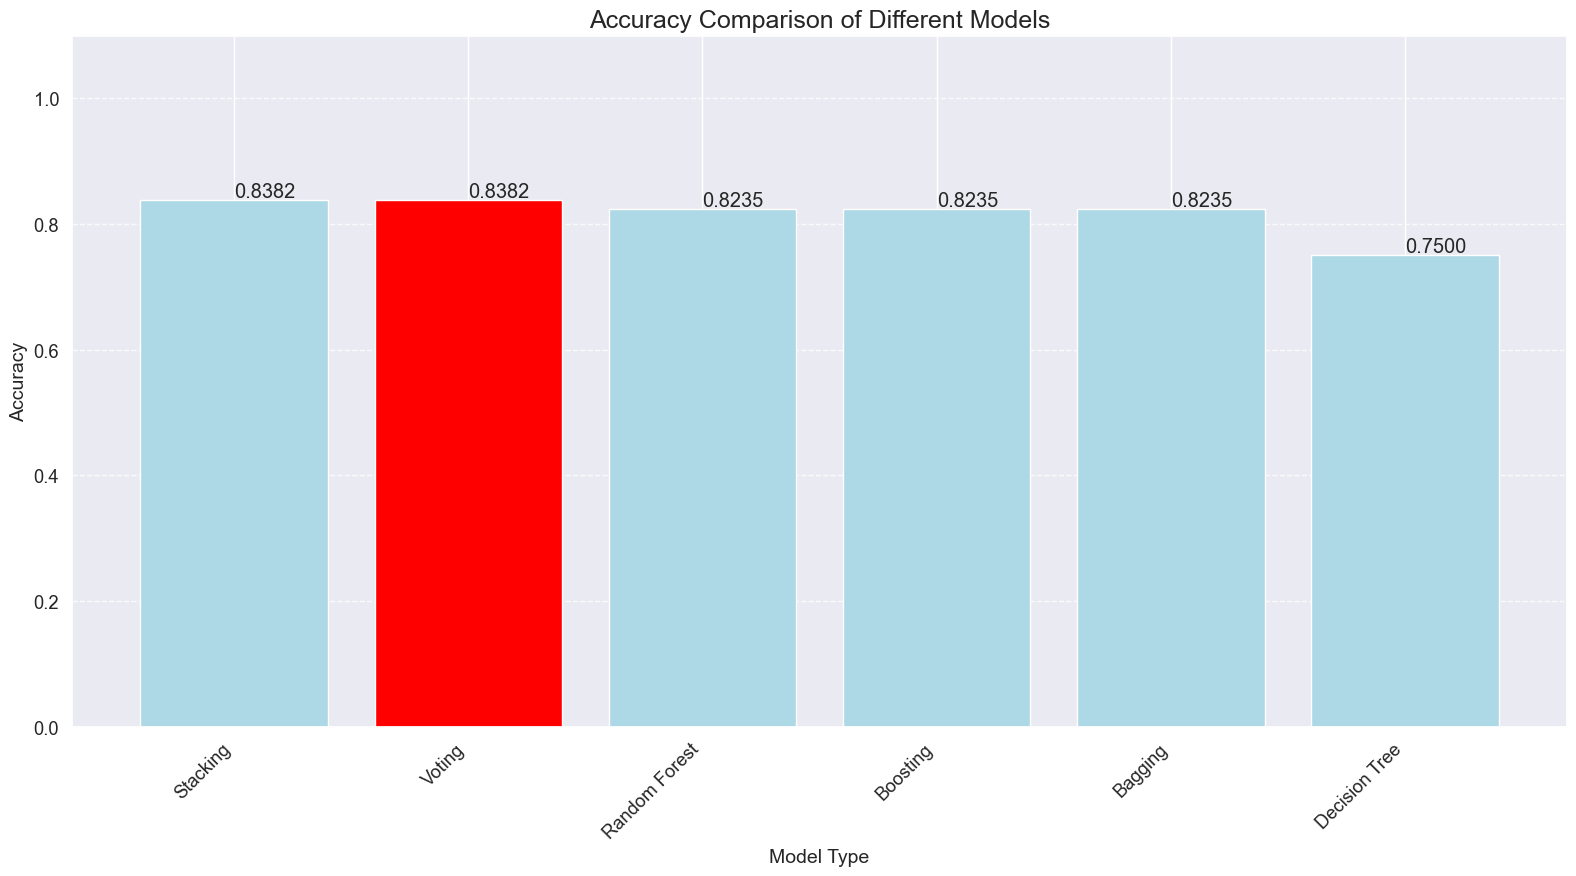

In [240]:
import matplotlib.pyplot as plt

# Accuracy scores for different models
accuracies = {
    "Decision Tree": dt_accuracy,
    "Random Forest": random_accuracy,
    "Stacking": stack_accuracy,
    "Boosting": boosting_accuracy,
    "Bagging": bagging_accuracy,
    "Voting":accuracy_ensemble  # Add accuracy for the ensemble model
}

# Sort the accuracies dictionary by values in descending order
accuracies = dict(sorted(accuracies.items(), key=lambda item: item[1], reverse=True))

# Create the bar chart
plt.figure(figsize=(16, 9))  # Adjust figure size as needed

# Define colors for each bar
colors = ['lightblue' if model != 'Voting' else 'red' for model in accuracies.keys()]

# Plot the bars
plt.bar(accuracies.keys(), accuracies.values(), color=colors)

# Customize chart elements
plt.xlabel("Model Type", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.title("Accuracy Comparison of Different Models", fontsize=18)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.ylim(0, 1.1)  # Set y-axis limits for precision

plt.grid(axis='y', linestyle='--', alpha=0.8)  # Add grid lines

# Annotate each bar with 8 decimal places
for i, v in enumerate(accuracies.values()):
    plt.text(i, v + 0.005, f"{v:.4f}")  # Format with 8 decimals

plt.tight_layout()  # Adjust layout for better spacing
plt.show()
